In [40]:
from preamble import *
import mglearn

#0 - No diseases, 1 Disease
df = pd.read_csv('./datasets/heart.csv')
print(df.shape)
df.head()
print("\n")
df.info()
print("\n")
df.describe()

(1025, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB




,age,sex,cp,trestbps,...,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,...,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,...,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,...,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,...,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,...,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,...,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,...,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,...,2.00,4.00,3.00,1.00


In [41]:
#Comprobar NAs
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
#df.drop_duplicates(inplace=True)
#print("Duplicados exactos:", df.duplicated().sum())

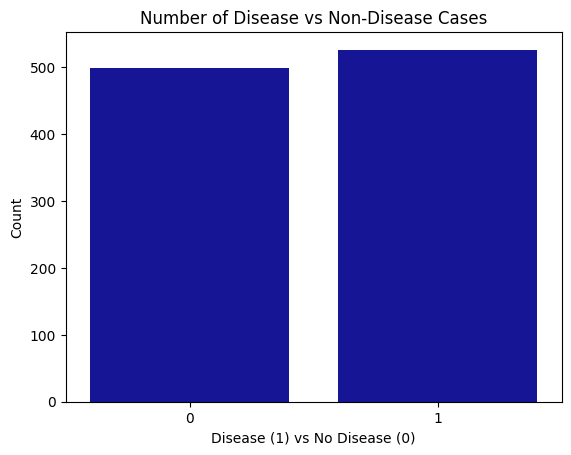

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.xlabel('Disease (1) vs No Disease (0)')
plt.ylabel('Count')
plt.title('Number of Disease vs Non-Disease Cases')
plt.show()

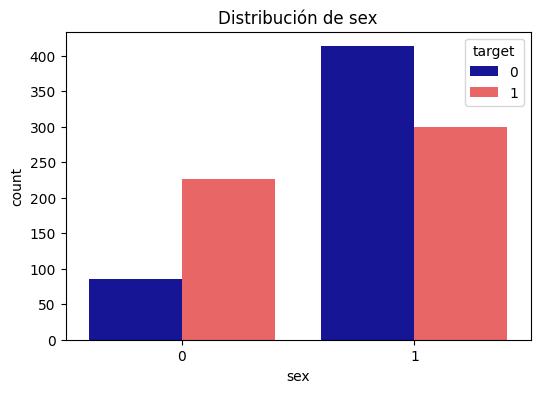

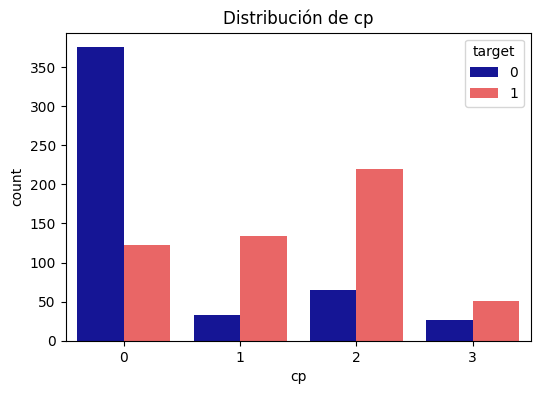

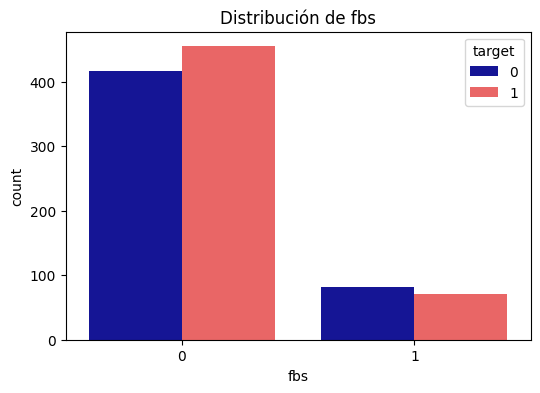

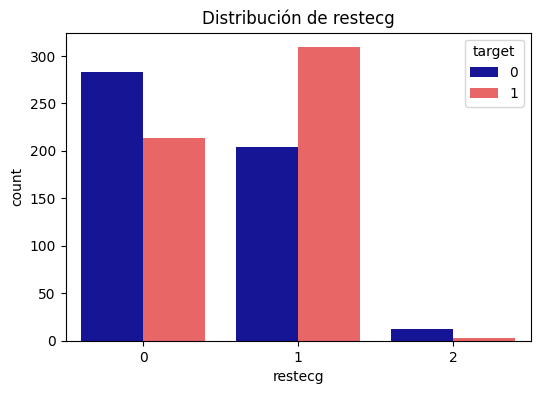

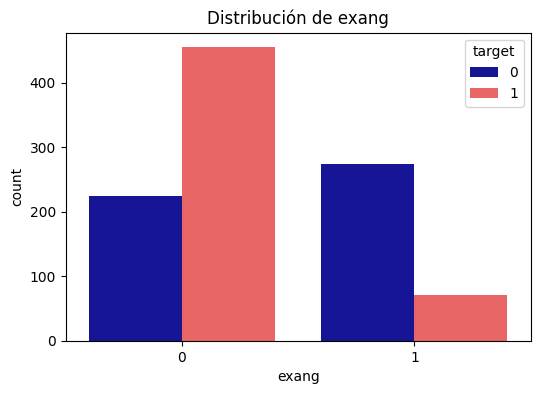

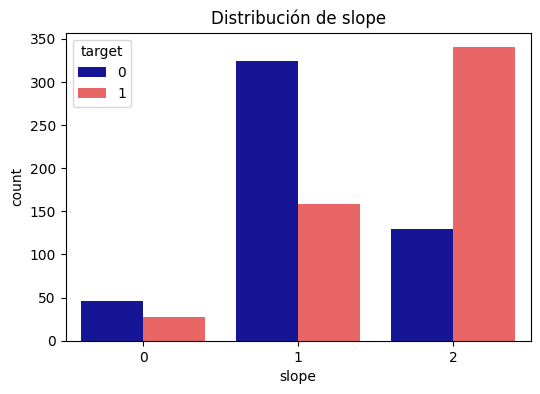

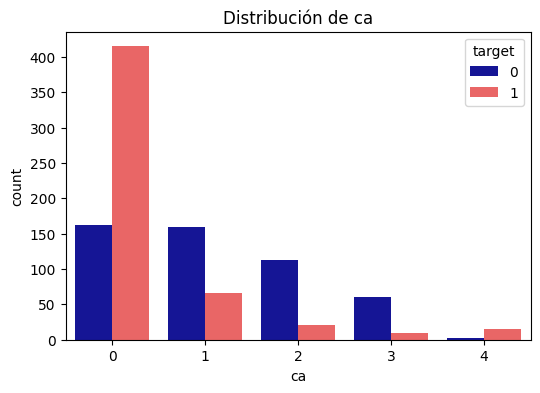

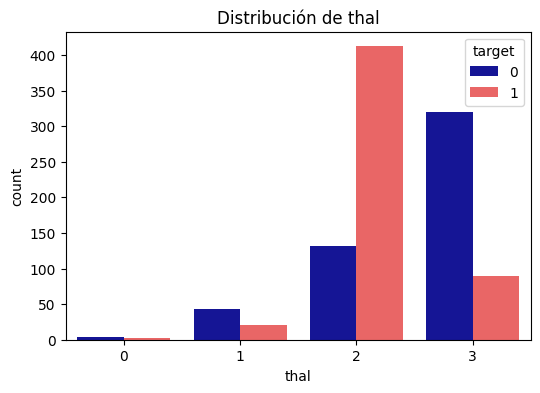

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listas de columnas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# ---------- CATEGÓRICAS ----------
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='target')  # hue='num' para ver sano/enfermo
    plt.title(f"Distribución de {col}")
    plt.show()


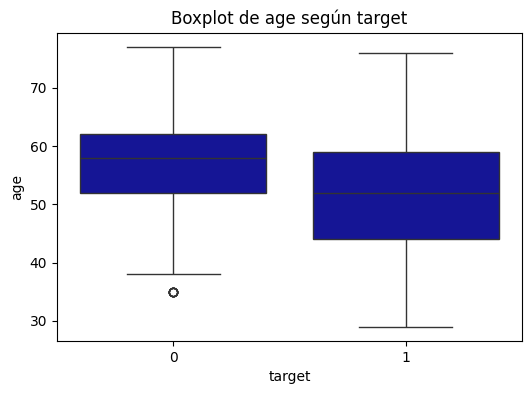

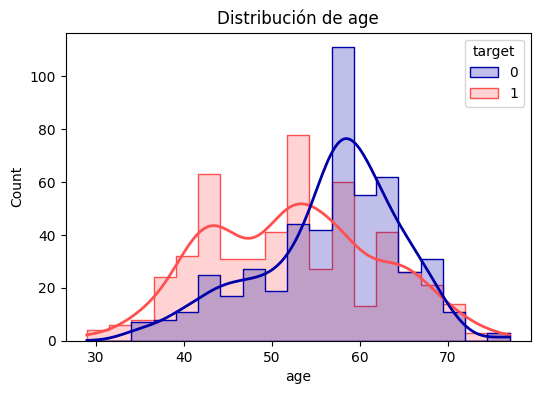

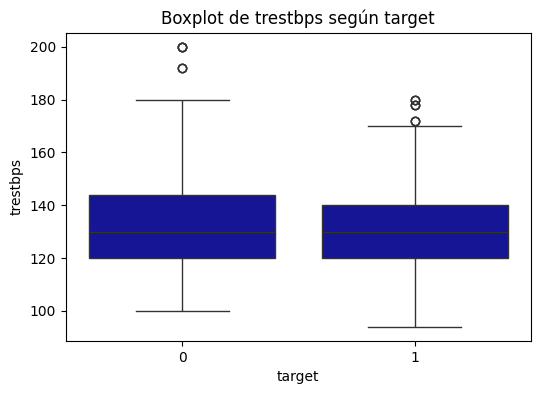

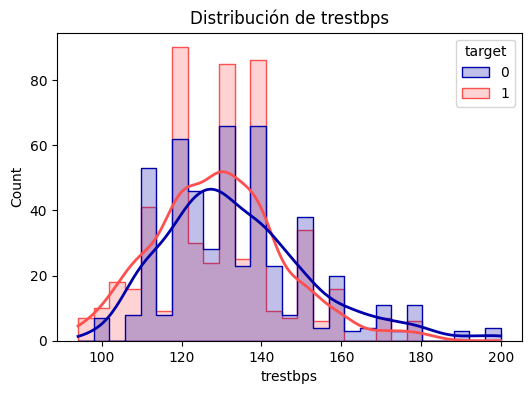

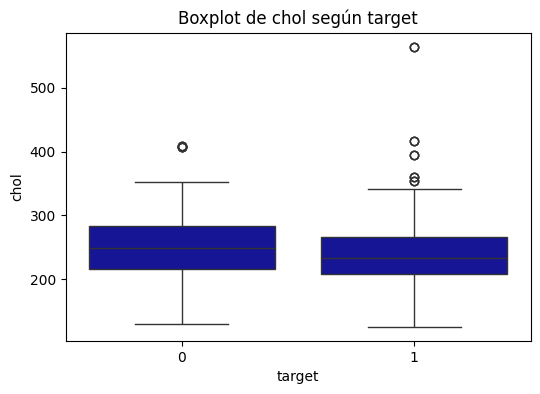

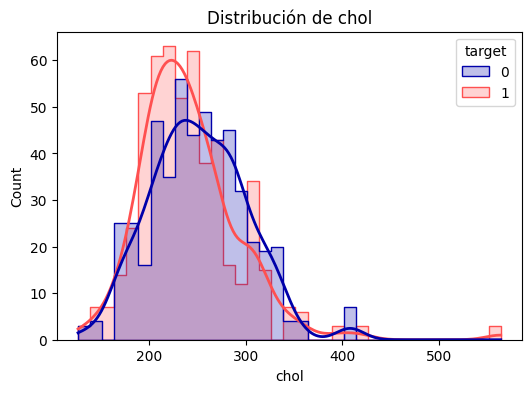

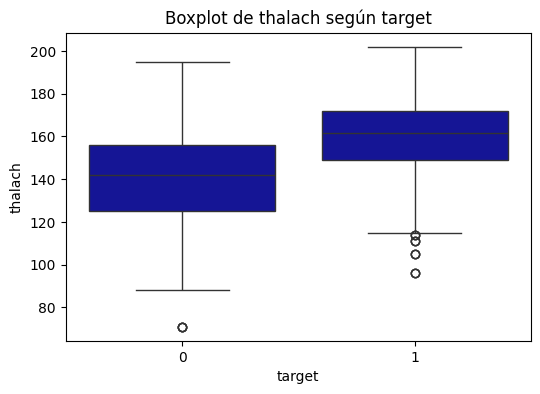

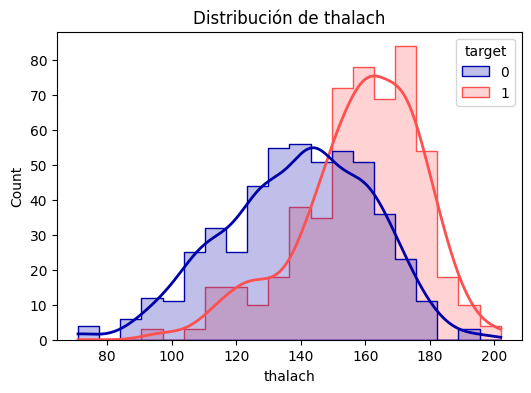

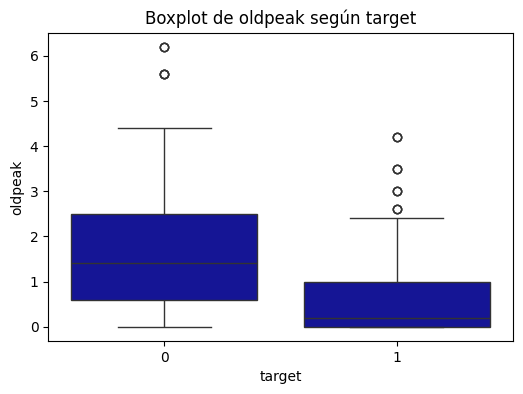

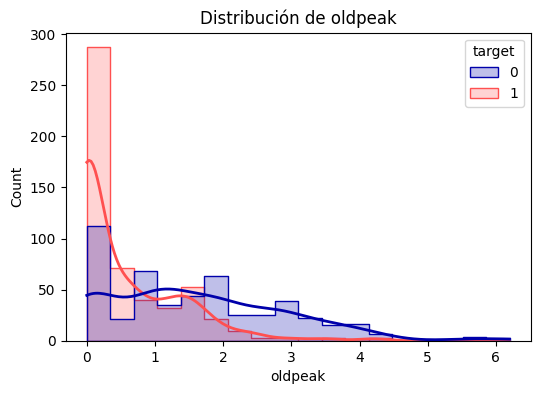

In [45]:
# ---------- NUMÉRICAS ----------
for col in num_cols:
    # Boxplot para ver outliers y diferencias por target
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='target', y=col)
    plt.title(f"Boxplot de {col} según target")
    plt.show()
    
    # Histplot para ver distribución general
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, hue='target', element="step")
    plt.title(f"Distribución de {col}")
    plt.show()

## Análisis univariado

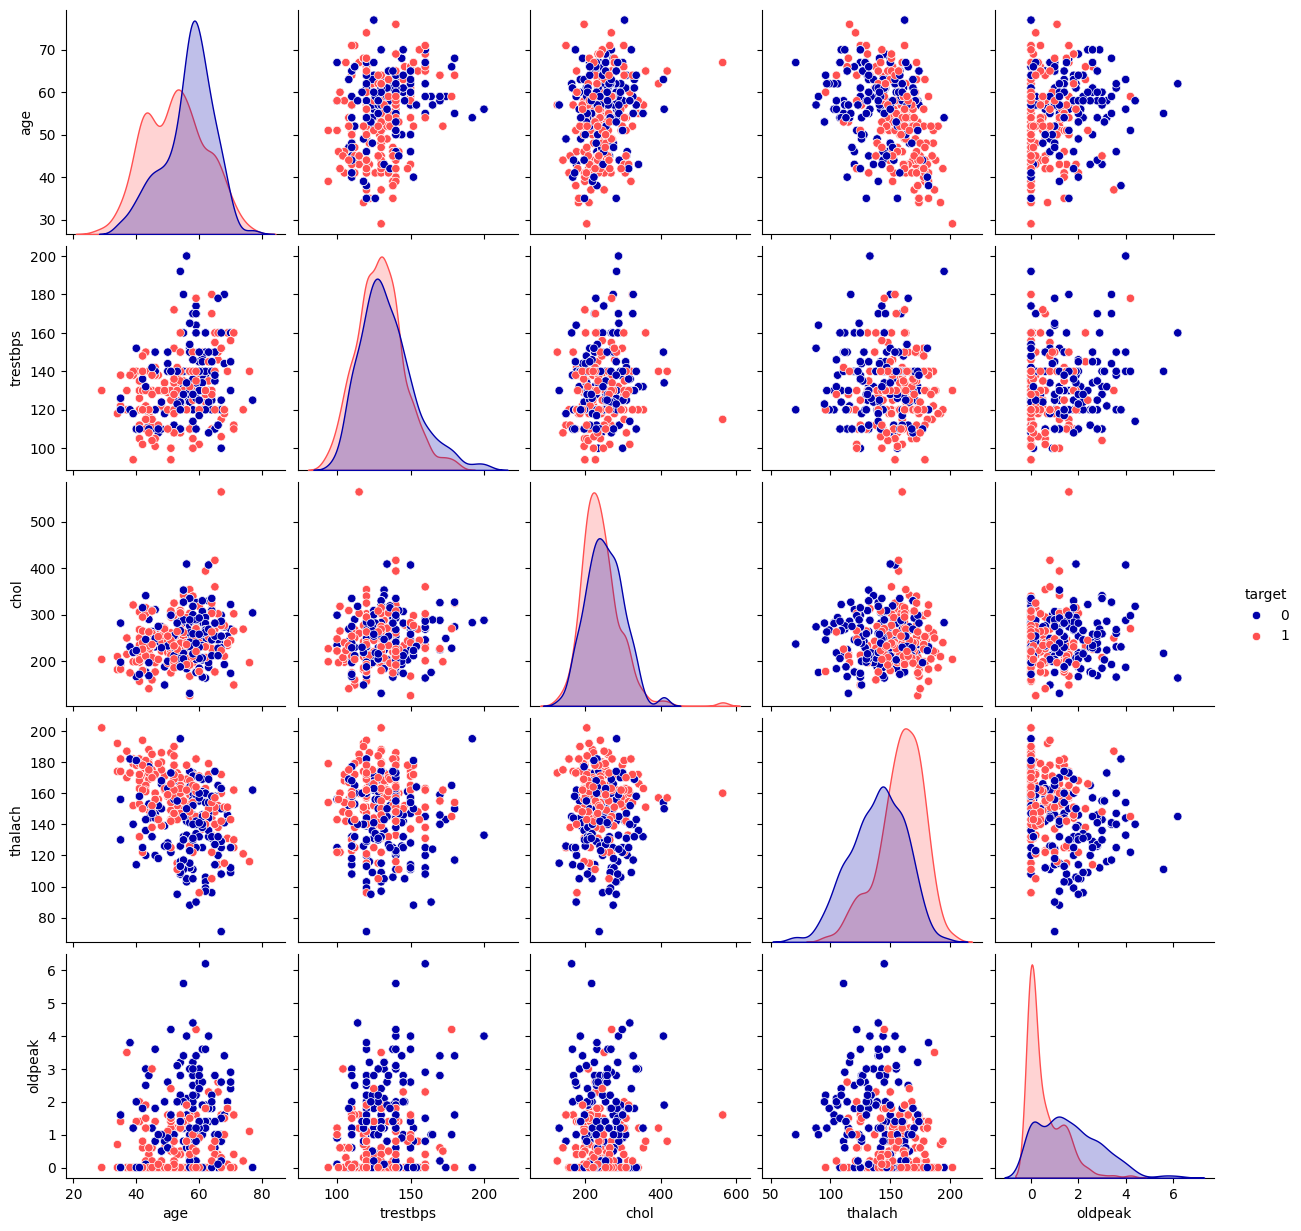

In [46]:
sns.pairplot(df, vars=['age','trestbps','chol','thalach','oldpeak'], hue='target')
plt.show()


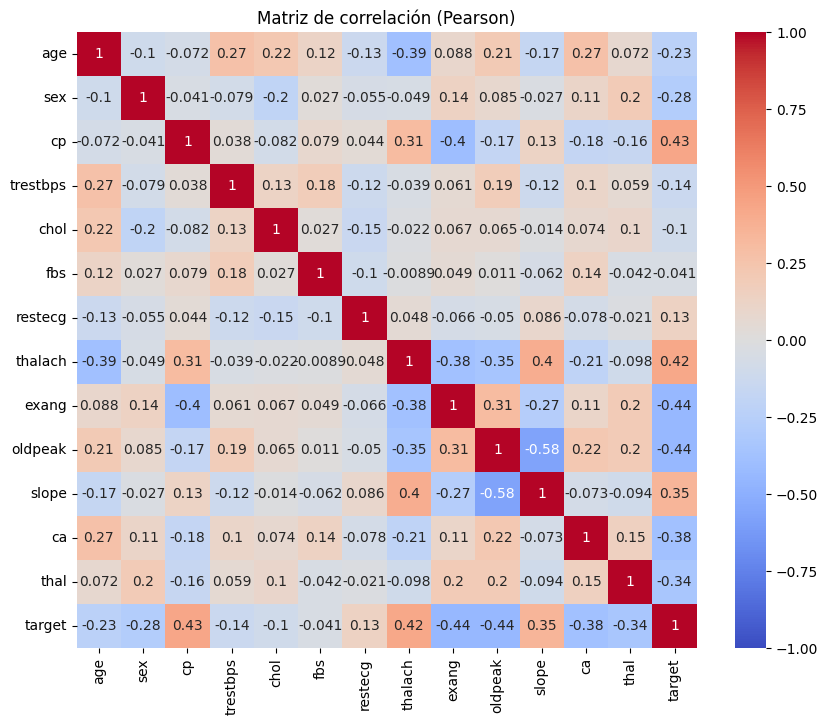

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlación (Pearson por defecto)
corr = df.corr(numeric_only=True)  # numeric_only evita problemas con categóricas

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Matriz de correlación (Pearson)")
plt.show()


oldpeak    -0.44
exang      -0.44
cp          0.43
thalach     0.42
ca         -0.38
slope       0.35
thal       -0.34
sex        -0.28
age        -0.23
trestbps   -0.14
restecg     0.13
chol       -0.10
fbs        -0.04
Name: target, dtype: float64


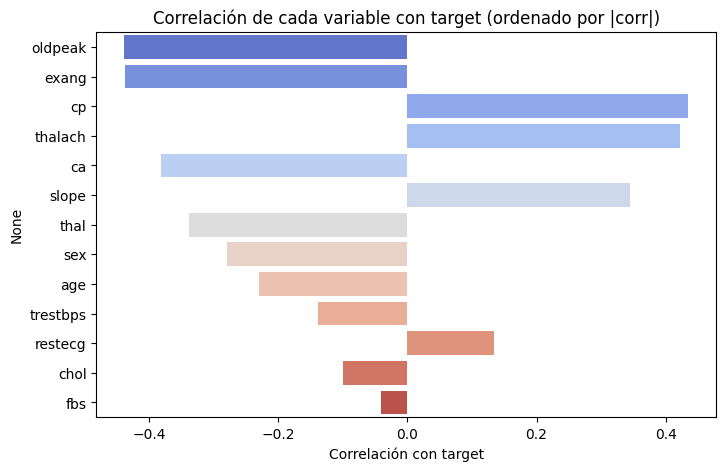

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlaciones
corr = df.corr(numeric_only=True)

# Seleccionar correlación con target
corr_target = corr['target'].drop('target')

# Ordenar por valor absoluto
corr_target_sorted = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

# Mostrar como tabla
print(corr_target_sorted)

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_target_sorted.values,
    y=corr_target_sorted.index,
    hue=corr_target_sorted.index,   # usamos la misma variable como hue
    dodge=False,                    # evita duplicados
    legend=False,                   # ocultamos la leyenda redundante
    palette="coolwarm"
)
plt.title("Correlación de cada variable con target (ordenado por |corr|)")
plt.xlabel("Correlación con target")
plt.show()



Accuracy: 0.8146341463414634

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205


Confusion matrix:
 [[70 30]
 [ 8 97]]

ROC AUC: 0.9299047619047619


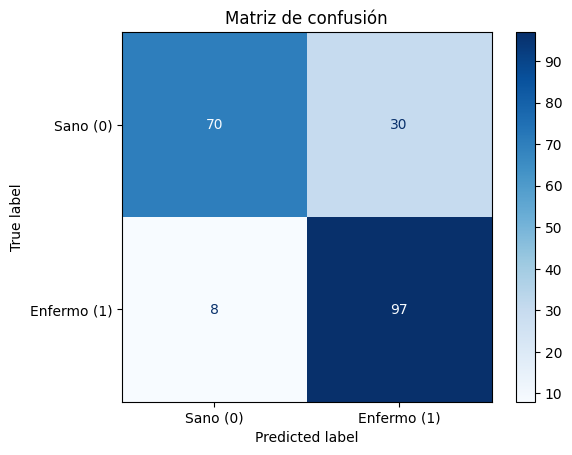

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
# === 1) Preparar datos ===
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 2) Pipeline mínimo (solo modelo) ===
pipe_basic = Pipeline(steps=[
    ('log_reg', LogisticRegression(max_iter=2000, random_state=42))
])

# === 3) Entrenar ===
pipe_basic.fit(X_train, y_train)

# === 4) Evaluar ===
y_pred = pipe_basic.predict(X_test)
y_pred_proba = pipe_basic.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_pred_proba))

# Calcular matriz de confusión
cm_display = ConfusionMatrixDisplay.from_estimator(
    pipe_basic, X_test, y_test,
    display_labels=["Sano (0)", "Enfermo (1)"],
    cmap="Blues"
)

plt.title("Matriz de confusión")
plt.show()


Accuracy: 0.8097560975609757

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

ROC AUC: 0.9293333333333333

Confusion matrix:
 [[70 30]
 [ 9 96]]


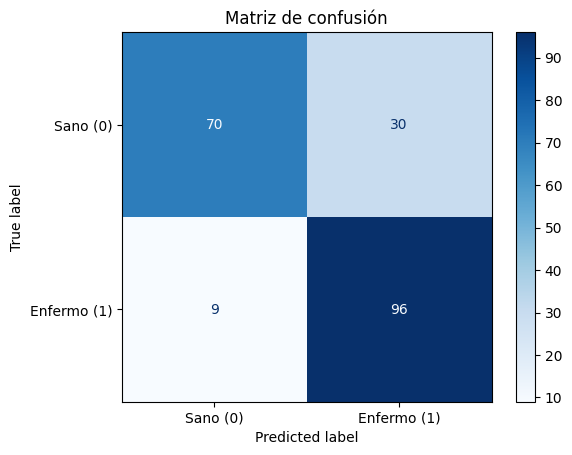

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1) Split ---
X = df.drop(columns='target')
y = df['target']

# Si tienes NaN y NO quieres imputar aún, puedes hacer:
# X = X.dropna()
# y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2) Definir columnas ---
num_cols   = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
bin_cols   = ['sex', 'fbs', 'exang']  # binarias a OHE
# El resto (cp, restecg, slope, ca, thal, etc.) quedan "passthrough"
rest_cols  = [c for c in X.columns if c not in num_cols + bin_cols]

# --- 3) Transformador de columnas ---
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('bin_ohe', OneHotEncoder(drop=None, handle_unknown='ignore', sparse_output=False), bin_cols),
        ('rest', 'passthrough', rest_cols)
    ],
    remainder='drop'
)

# --- 4) Pipeline: prepro + modelo ---
pipe = Pipeline(steps=[
    ('pre', preprocess),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# --- 5) Entrenar y evaluar ---
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Matriz de confusión (plot)
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=["Sano (0)", "Enfermo (1)"], cmap="Blues")
plt.title("Matriz de confusión")
plt.show()


 accuracy: 0.865 ± 0.010
  roc_auc: 0.937 ± 0.011
precision: 0.852 ± 0.031
   recall: 0.895 ± 0.030
       f1: 0.872 ± 0.007

Confusion matrix (CV):
 [[416  83]
 [ 55 471]]


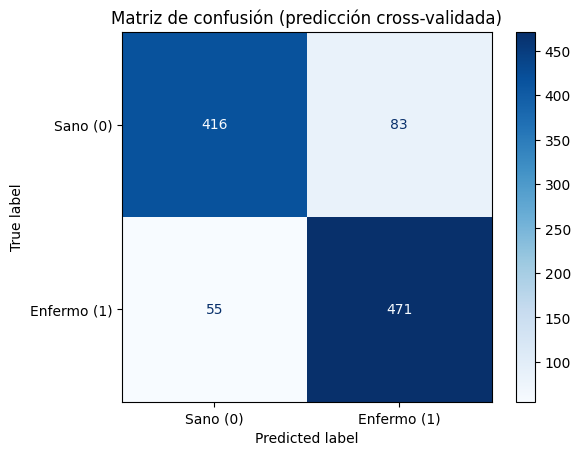


ROC AUC (CV, out-of-fold): 0.9365841950059816


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

# --- 1) Definir columnas ---
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  # todas categóricas (binarias y no binarias)

# --- 2) Preprocesado ---
#   - Numéricas: imputación (mediana) + escalado
#   - Categóricas: imputación (moda) + One-Hot (las binarias se “droppean” automáticamente)
#   Nota: en scikit-learn<1.2 usa OneHotEncoder(sparse=False) en lugar de sparse_output=False
preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
        ]), cat_cols),
    ],
    remainder='drop'
)

# --- 3) Modelo ---
pipe = Pipeline(steps=[
    ('pre', preprocess),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
    # Si hay desbalanceo, prueba: ('clf', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

# --- 4) Cross-Validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(pipe, df.drop(columns='target'), df['target'],
                            cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)

# Mostrar medias ± std
for m in scoring.keys():
    scores = cv_results[f'test_{m}']
    print(f"{m:>9}: {scores.mean():.3f} ± {scores.std():.3f}")

# --- 5) Matriz de confusión con predicción cross-validada ---
y_pred_cv = cross_val_predict(pipe, df.drop(columns='target'), df['target'], cv=cv, method='predict', n_jobs=-1)
cm = confusion_matrix(df['target'], y_pred_cv)
print("\nConfusion matrix (CV):\n", cm)

# Plot
ConfusionMatrixDisplay(cm, display_labels=["Sano (0)", "Enfermo (1)"]).plot(cmap="Blues")
plt.title("Matriz de confusión (predicción cross-validada)")
plt.show()

# (Opcional) AUC con probabilidades cross-validada
y_proba_cv = cross_val_predict(pipe, df.drop(columns='target'), df['target'], cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
print("\nROC AUC (CV, out-of-fold):", roc_auc_score(df['target'], y_proba_cv))


Mejores hiperparámetros: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Mejor ROC AUC (CV):      0.9370142360741764

=== Métricas en TEST ===
Accuracy : 0.8731707317073171
Precision: 0.8558558558558559
Recall   : 0.9047619047619048
F1       : 0.8796296296296297
ROC AUC  : 0.9460952380952382


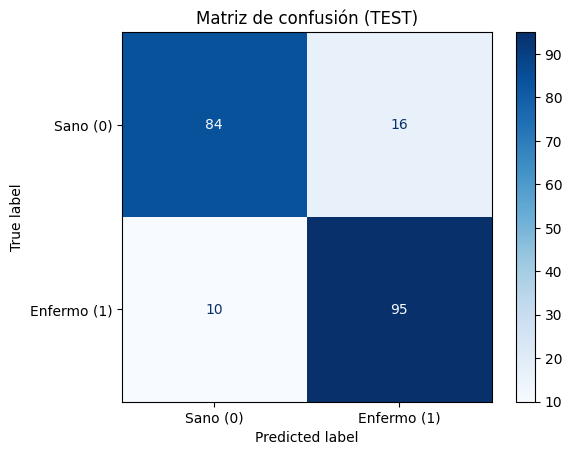

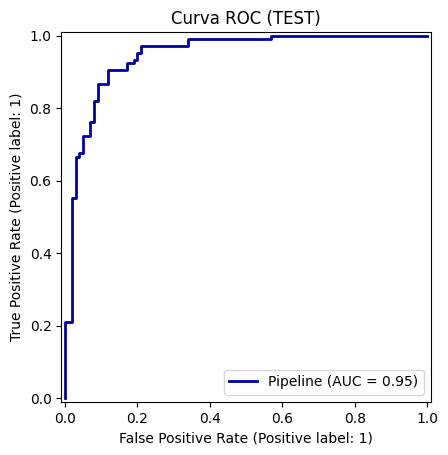

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt

# ===== 1) Split =====
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===== 2) Columnas =====
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# ===== 3) Preprocesado =====
preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
        ]), cat_cols),
    ],
    remainder='drop'
)

# ===== 4) Pipeline base =====
pipe = Pipeline(steps=[
    ('pre', preprocess),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# ===== 5) Grid de hiperparámetros (seguros entre sí) =====
param_grid = {
    'clf__solver': ['lbfgs', 'liblinear'],        # ambos admiten penalty='l2'
    'clf__penalty': ['l2'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',     # métrica principal
    cv=cv,
    n_jobs=-1,
    refit=True,            # re-entrena con los mejores hiperparámetros en todo el train
    return_train_score=True,
    verbose=0
)

# ===== 6) Entrenar GridSearch en TRAIN =====
grid.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor ROC AUC (CV):     ", grid.best_score_)

best_model = grid.best_estimator_

# ===== 7) Evaluación en TEST =====
y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Métricas en TEST ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1       :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test,
    display_labels=["Sano (0)", "Enfermo (1)"],
    cmap="Blues"
)
plt.title("Matriz de confusión (TEST)")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Curva ROC (TEST)")
plt.show()


      feature  coef  abs_coef
22       ca_4  2.98      2.98
20       ca_2 -2.29      2.29
5       sex_1 -1.86      1.86
23     thal_0 -1.34      1.34
18       ca_0  1.34      1.34
6        cp_0 -1.21      1.21
24     thal_1  1.12      1.12
9        cp_3  1.04      1.04
25     thal_2  0.99      0.99
8        cp_2  0.92      0.92
17    slope_2  0.90      0.90
19       ca_1 -0.86      0.86
14    exang_1 -0.81      0.81
21       ca_3 -0.77      0.77
12  restecg_1  0.60      0.60


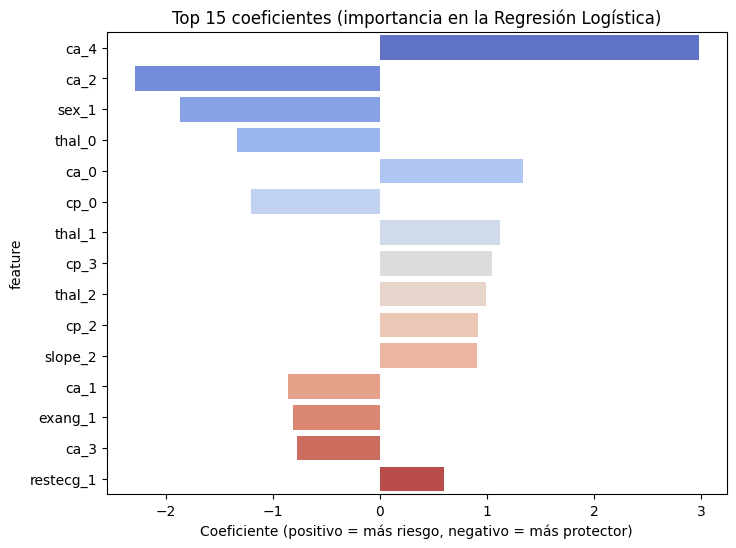

In [59]:
# Buscar que variables han sido las claves para la seleccion
import numpy as np
import pandas as pd

# --- 1) Recuperar el preprocesador y el modelo ---
pre = best_model.named_steps['pre']
clf = best_model.named_steps['clf']

# --- 2) Nombres de las columnas después del preprocesado ---
num_features = pre.named_transformers_['num'].named_steps['scaler'].get_feature_names_out(num_cols)

cat_features = pre.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_cols)

feature_names = np.concatenate([num_features, cat_features])

# --- 3) Coeficientes ---
coefs = pd.DataFrame({
    'feature': feature_names,
    'coef': clf.coef_.flatten()
})

# Ordenado por magnitud absoluta (impacto)
coefs['abs_coef'] = coefs['coef'].abs()
coefs_sorted = coefs.sort_values(by='abs_coef', ascending=False)

print(coefs_sorted.head(15))  # top 15

# --- 4) Visualización ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(
    data=coefs_sorted.head(15),
    x='coef', y='feature', hue='feature',
    dodge=False, legend=False, palette="coolwarm"
)
plt.title("Top 15 coeficientes (importancia en la Regresión Logística)")
plt.xlabel("Coeficiente (positivo = más riesgo, negativo = más protector)")
plt.show()


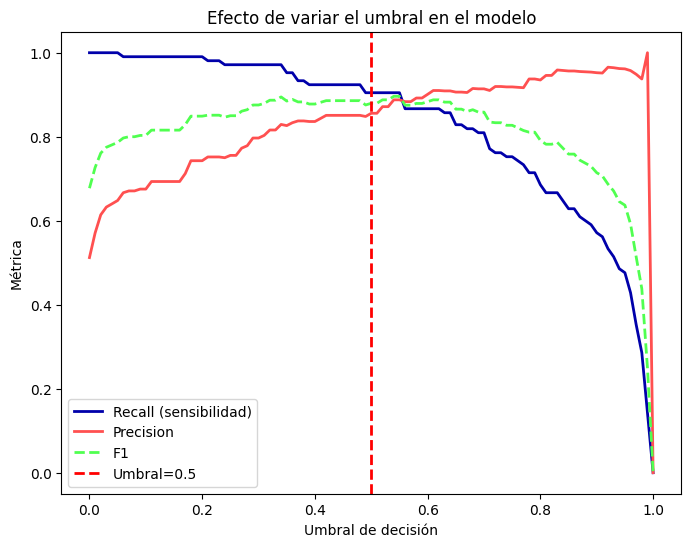

Umbral sugerido: 0.05


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score

# --- Probabilidades predichas en TEST ---
y_proba = best_model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.0, 1.0, 101)  # de 0 a 1 en pasos de 0.01
metrics = []

for t in thresholds:
    y_pred_thr = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thr).ravel()
    
    metrics.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_thr, zero_division=0),
        "recall": recall_score(y_test, y_pred_thr),
        "f1": f1_score(y_test, y_pred_thr),
        "fn": fn,
        "fp": fp
    })

metrics = pd.DataFrame(metrics)

# --- Visualización recall vs precision ---
plt.figure(figsize=(8,6))
plt.plot(metrics["threshold"], metrics["recall"], label="Recall (sensibilidad)")
plt.plot(metrics["threshold"], metrics["precision"], label="Precision")
plt.plot(metrics["threshold"], metrics["f1"], label="F1")
plt.axvline(0.5, color="red", linestyle="--", label="Umbral=0.5")
plt.xlabel("Umbral de decisión")
plt.ylabel("Métrica")
plt.title("Efecto de variar el umbral en el modelo")
plt.legend()
plt.show()

# --- Encontrar umbral óptimo según criterio ---
# Ejemplo: minimizar falsos negativos, pero manteniendo razonable precisión
best_thr = metrics.sort_values(by=["fn", "fp"]).iloc[0]["threshold"]
print("Umbral sugerido:", best_thr)


Evaluación con umbral = 0.05
              precision    recall  f1-score   support

           0       1.00      0.43      0.60       100
           1       0.65      1.00      0.79       105

    accuracy                           0.72       205
   macro avg       0.82      0.71      0.69       205
weighted avg       0.82      0.72      0.70       205


Confusion matrix:
 [[ 43  57]
 [  0 105]]


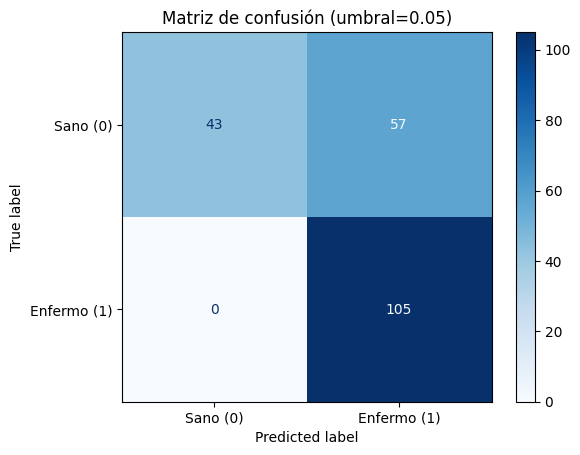

In [61]:
# Probabilidades predichas
y_proba = best_model.predict_proba(X_test)[:, 1]

# Aplicar el nuevo umbral (ejemplo: 0.05)
threshold = 0.05
y_pred_custom = (y_proba >= threshold).astype(int)

# Métricas con el nuevo umbral
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(f"Evaluación con umbral = {threshold}")
print(classification_report(y_test, y_pred_custom))

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_custom))

# Matriz de confusión gráfica
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_custom, display_labels=["Sano (0)", "Enfermo (1)"], cmap="Blues")
plt.title(f"Matriz de confusión (umbral={threshold})")
plt.show()


In [62]:
from sklearn.metrics import accuracy_score

# Probabilidades predichas
y_proba = best_model.predict_proba(X_test)[:, 1]

# Umbral elegido
threshold = 0.05
y_pred_custom = (y_proba >= threshold).astype(int)

# Accuracy en test
acc_custom = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy con umbral={threshold}: {acc_custom:.3f}")


Accuracy con umbral=0.05: 0.722
